<strong>1. Đọc file ngữ liệu đã thu thập</strong>

In [1]:
f = open('data/corpus.txt', 'r', encoding= 'utf-8')
data = [line[:-1] for line in f.readlines()]
f.close()

print('Số câu dữ liệu: ', len(data))

Số câu dữ liệu:  82105


In [2]:
data[:10]

['Trước đó, Hoàng Việt Travel và một số công ty khác trên thị trường cũng thực hiện tour khảo sát dịp hè ở Moskva, St.',
 'Để bảo vệ gan, bác sĩ Hà khuyến cáo mỗi người cần duy trì thói quen ăn uống lành mạnh, tập thể dục đều đặn và khám sức khỏe định kỳ.',
 'Nghi can sau đó lĩnh thêm hai án tù liên quan đánh bạc.',
 'Chuyến đi một ngày "chén sạch Hải Phòng" với các món ăn tiêu biểu như bánh đa cua, bánh mì cay, sủi dìn, giá bể, cà phê cốt dừa, bánh đúc tàu, trà cúc, các loại ốc sẽ là gợi ý phù hợp cho những du khách có "tâm hồn ăn uống".',
 'Michael O\'Regan, giảng viên Đại học Glasgow Caledonian ở Scotland, cho rằng thuật ngữ trên không phản ánh được thực tế bất lực trong việc quản lý đám đông hiện nay. "Du lịch đã quay trở lại nhanh hơn chúng tôi mong đợi", Micheal nói.',
 'Ba bàn và hai đường kiến tạo trong một trận đấu cũng là điều Ronaldo chưa từng làm được trong sự nghiệp, trong khi Messi đã trải qua bốn trận như vậy, năm 2010, 2011, 2018 và 2024.',
 'Ngày 21/10, Ngân hàng Trung

<strong>2. Tạo danh sách chứa đầy đủ các ký tự trong tiếng Việt và các danh sach chứa những ký tự thường lỗi hoặc từ viết</strong>

In [3]:
vowel = list('aàáảãạăằắẳẵặâầấẩẫậeèéẻẽẹêềếểễệiìíỉĩịoòóỏõọôồốổỗộơờớởỡợuùúủũụưừứửữựyỳýỷỹỵAÀÁẢÃẠĂẰẮẲẴẶÂẦẤẨẪẬEÈÉẺẼẸÊỀẾỂỄỆIÌÍỈĨỊOÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢUÙÚỦŨỤƯỪỨỬỮỰYỲÝỶỸỴ')
full_letters = vowel + list('bcdfghjklmnpqrstvwxzBCDFGHJKLMNPQRSTVWXZđĐ')

# Những lỗi thường gặp trong Tiếng Việt
typo = {
        "à": "af", "á": "as", "ả": "ar", "ã": "ax", "ạ": "aj", 
        "â": "aa", "ấ": "aas", "ầ": "aaf", "ẩ": "aar", "ẫ": "aax", "ậ": "aaj", 
        "ă": "aw", "ắ": "aws", "ằ": "awf", "ẳ": "awr", "ẵ": "awx", "ặ": "awj",
        "À": "Af", "Á": "As", "Ả": "Ar", "Ã": "Ax", "Ạ": "Aj", "Â": "Aa", 
        "Ấ": "Aas", "Ầ": "Aaf", "Ẩ": "Aar", "Ẫ": "Aax", "Ậ": "Aaj", 
        "Ă": "Aw", "Ắ": "Aws", "Ằ": "Awf", "Ẳ": "Awr", "Ẵ": "Awx", "Ặ": "Awj",
        "đ": "dd", "Đ": "Dd",
        "è": "ef", "é": "es", "ẻ": "er", "ẽ": "ex", "ẹ": "ej", 
        "ê": "ee", "ế": "ees", "ề": "eef", "ể": "eer", "ễ": "eex", "ệ": "eej", 
        "È": "Ef", "É": "Es", "Ẻ": "Er", "Ẽ": "Ex", "Ẹ": "Ej", 
        "Ê": "Ee", "Ế": "Ees", "Ề": "Eef", "Ể": "Eer", "Ễ": "Eex", "Ệ": "Eej",
        "ì": "if", "í": "is", "ỉ": "ir", "ĩ": "ix", "ị": "ij", 
        "Ì": "If", "Í": "Is", "Ỉ": "Ir", "Ĩ": "Ix", "Ị": "Ij",
        "ò": "of", "ó": "os", "ỏ": "or", "õ": "ox", "ọ": "oj", 
        "ô": "oo", "ố": "oos", "ồ": "oof", "ổ": "oor", "ỗ": "oox", "ộ": "ooj", 
        "ơ": "ow", "ớ": "ows", "ờ": "owf", "ở": "owr", "ỡ": "owx", "ợ": "owj", 
        "Ò": "Of", "Ó": "Os", "Ỏ": "Or", "Õ": "Ox", "Ọ": "Oj", 
        "Ô": "Oo", "Ố": "Oos", "Ồ": "Oof", "Ổ": "Oor", "Ỗ": "Oox", "Ộ": "Ooj", 
        "Ơ": "Ow", "Ớ": "Ows", "Ờ": "Owf", "Ở": "Owr", "Ỡ": "Owx", "Ợ": "Owj",
        "ù": "uf", "ú": "us", "ủ": "ur", "ũ": "ux", "ụ": "uj", 
        "ư": "uw", "ứ": "uws", "ừ": "uwf", "ử": "uwr", "ữ": "uwx", "ự": "uwj", 
        "Ù": "Uf", "Ú": "Us", "Ủ": "Ur", "Ũ": "Ux", "Ụ": "Uj", 
        "Ư": "Uw", "Ứ": "Uws", "Ừ": "Uwf", "Ử": "Uwr", "Ữ": "Uwx", "Ự": "Uwj",
        "ỳ": "yf", "ý": "ys", "ỷ": "yr", "ỹ": "yx", "ỵ": "yj", 
        "Ỳ": "Yf", "Ý": "Ys", "Ỷ": "Yr", "Ỹ": "Yx", "Ỵ": "Yj"}

region = {'ả':'ã','ã':'ả','ẻ':'ẽ','ẽ':'ẻ','ỉ':'ĩ','ĩ':'ỉ','ỏ':'õ','õ':'ỏ', 'ổ':'ỗ', 'ỗ':'ổ', 'ủ':'ũ','ũ':'ủ', 'ử':'ữ', 'ữ':'ử' ,'ỷ':'ỹ','ỹ':'ỷ', 
          'À':'Ã','Ã':'À','È':'Ẽ','Ẽ':'È','Ì':'Ĩ','Ĩ':'Ì','Ò':'Õ','Õ':'Ò', 'Ổ':'Ỗ', 'Ỗ':'Ổ', 'Ù':'Ũ','Ũ':'Ù', 'Ử':'Ữ', 'Ữ':'Ử' ,'Ỳ':'Ỹ','Ỹ':'Ỳ'}


region2 = {'ch':'tr', 'tr':'ch','gi':'d','d':'gi','l':'n','n':'l','s':'x','x':'s',
           'Ch':'Tr', 'Tr':'Ch','Gi':'D','D':'Gi','L':'N','N':'L','S':'X','X':'S'}

acronym = {'anh':'a','biết':'bít','chồng':'ck','được':'đc','em':'e','gì':'j','giờ':'h',
           'Anh':'A','Biết':'Bít','Chồng':'Ck','Được':'Đc','Em':'E','Gì':'J','Giờ':'H',
           'không':'ko','muốn':'mún','ông':'ôg','phải':'fai','tôi':'t','vợ':'vk','yêu':'iu',
           'Không':'Ko','Muốn':'Mún','Ông':'Ôg','Phải':'Fai','Tôi':'T','Vợ':'Vk','Yêu':'Iu',
           } 

In [4]:
!pip install unidecode

<strong>3. Viết hàm tạo ra dữ liệu nhiễu</strong>

In [5]:
import re
import numpy as np
from unidecode import unidecode

# Hàm thêm từ viết tắt
def _teen_code(sentence):
    random = np.random.uniform(0,1,1)[0]
    new_sentence = str(sentence)

    if random > 0.5:
        for word in acronym.keys():
            if re.search(word, new_sentence):
                random2 = np.random.uniform(0,1,1)[0]
                if random2 < 0.5:
                    new_sentence = re.sub(word, acronym[word], new_sentence)
        return new_sentence
    else:
        return sentence
# Hàm thêm các lỗi
def _add_noise(sentence):
    sentence = _teen_code(sentence)
    noisy_sentence = ''

    i = 0
    while i < len(sentence):
        if sentence[i] not in full_letters:
            noisy_sentence += sentence[i]
        else:
            random = np.random.uniform(0,1,1)[0]
            if random <= 0.94:
                noisy_sentence += sentence[i]
            elif random <= 0.985:
                if sentence[i] in typo.keys():
                    if sentence[i] in region.keys():
                        random2 = np.random.uniform(0,1,1)[0]
                        if random2 <= 0.4:
                            noisy_sentence += typo[sentence[i]]
                        elif random2 < 0.8:
                            noisy_sentence += region[sentence[i]]
                        elif random < 0.95:
                            noisy_sentence += unidecode(sentence[i])
                        else:
                            noisy_sentence += sentence[i]
                    else:
                        random3 = np.random.uniform(0,1,1)[0]
                        if random3 <= 0.6:
                            noisy_sentence += typo[sentence[i]]
                        elif random3 < 0.9:
                            noisy_sentence += unidecode(sentence[i])
                        else:
                            noisy_sentence += sentence[i]
                elif i == 0 or sentence[i-1] not in full_letters:
                    random4 = np.random.uniform(0,1,1)[0]
                    if random4 <= 0.9:
                        if i < len(sentence) - 1 and sentence[i] in region2.keys() and sentence[i+1] in vowel:
                            noisy_sentence += region2[sentence[i]]
                        elif i < len(sentence) - 2 and sentence[i:i+2] in region2.keys() and sentence[i+2] in vowel:
                            noisy_sentence += region2[sentence[i:i+2]]
                            i += 1
                        else:
                            noisy_sentence += sentence[i]
                    else:
                        noisy_sentence += sentence[i]
                else:
                    noisy_sentence += sentence[i]
            else:
                new_random = np.random.uniform(0,1,1)[0]
                if new_random <= 0.33 and i != len(sentence) - 1:
                    noisy_sentence += sentence[i+1]
                    noisy_sentence += sentence[i]
                    i += 1
                else:
                    noisy_sentence += sentence[i]
        i += 1
    return noisy_sentence


In [23]:
_add_noise('Xử lý ngôn ngữ tự nhiên')

'Xử ný ngôn ngữ tự nhiên'

In [24]:
# Các ký tự có thể xuất hiện trong encoder
alphabet = ['\x00', ' '] + list('0123456789') + full_letters
print(len(alphabet))
print(alphabet)

198
['\x00', ' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'à', 'á', 'ả', 'ã', 'ạ', 'ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'A', 'À', 'Á', 'Ả', 'Ã', 'Ạ', 'Ă', 'Ằ', 'Ắ', 'Ẳ', 'Ẵ', 'Ặ', 'Â', 'Ầ', 'Ấ', 'Ẩ', 'Ẫ', 'Ậ', 'E', 'È', 'É', 'Ẻ', 'Ẽ', 'Ẹ', 'Ê', 'Ề', 'Ế', 'Ể', 'Ễ', 'Ệ', 'I', 'Ì', 'Í', 'Ỉ', 'Ĩ', 'Ị', 'O', 'Ò', 'Ó', 'Ỏ', 'Õ', 'Ọ', 'Ô', 'Ồ', 'Ố', 'Ổ', 'Ỗ', 'Ộ', 'Ơ', 'Ờ', 'Ớ', 'Ở', 'Ỡ', 'Ợ', 'U', 'Ù', 'Ú', 'Ủ', 'Ũ', 'Ụ', 'Ư', 'Ừ', 'Ứ', 'Ử', 'Ữ', 'Ự', 'Y', 'Ỳ', 'Ý', 'Ỷ', 'Ỹ', 'Ỵ', 'b', 'c', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't', 'v', 'w', 'x', 'z', 'B', 'C', 'D', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'X', 'Z', 'đ', 'Đ']


<strong>4. Tách câu thành các cụm tù dựa vào dấu phân cách hoặc ký tự đặc biệt</strong>

In [25]:
# Tách câu thành các cụm từ dựa vào các ký tự không phải số và chữ cái
phrases = []

for text in data:
    #Thay thế hoặc xóa bỏ các ký tự thừa
    for c in set(text):
        if re.match(r'\w', c) and c not in alphabet:
            uc = unidecode(c)
            if re.match(r'\w', uc) and uc not in alphabet:
                text = re.sub(c, '', text)
            else:
                text = re.sub(c, uc, text)
    phrases += re.findall(r'\w[\w\s]+', text)

phrases = [p.strip() for p in phrases if len(p.split()) > 1]

print(len(phrases))
phrases[-10:]

239983


['làm du lịch',
 'cũng cho hay trời',
 'đang nắng đẹp',
 'Giờ tôi chín chắn',
 'biết trân trọng sức khỏe hơn',
 'không uống bia rượu',
 'hạn chế nhậu nhẹt',
 '000 baht',
 '30 triệu đồng',
 'ông ChattanKunjara Na Ayudhya cho biết']

In [26]:
!pip install --upgrade nltk

<strong>5. Tách các cụm từ thành danh sách 5-grams với độ dài tối đa là 39 ký tự</strong>

In [27]:
from nltk import ngrams
# Chia các cụm từ thành các cụm tối đa là 5 g-rams
# Độ dài tối đa của 1 từ trong tiếng việt là  7 (nghiêng)
# Vì vậy độ dài tối đa của cụm 5 g-rams và các khoảng cách ở giữa là 7*5 + 4 = 39
NGRAM = 5 
MAXLEN = 39 

list_ngrams = []
for p in phrases:
    list_p = p.split()
    if(len(list_p) >= NGRAM):
        for ngr in ngrams(p.split(), NGRAM):
            if len(' '.join(ngr)) <= MAXLEN:
                list_ngrams.append(' '.join(ngr))
    elif len(' '.join(list_p)) <= MAXLEN:
        list_ngrams.append(' '.join(list_p))

list_ngrams = list((list_ngrams))
print(len(list_ngrams))
list_ngrams[:10]

1318927


['Trước đó',
 'Hoàng Việt Travel và một',
 'Việt Travel và một số',
 'Travel và một số công',
 'và một số công ty',
 'một số công ty khác',
 'số công ty khác trên',
 'công ty khác trên thị',
 'ty khác trên thị trường',
 'khác trên thị trường cũng']

<strong>6. Viết hàm encoder chuyển chuỗi thành mảng vector one-hot có kích thước 39x198 hàm decoder giải mã ra chuỗi có độ dài 39 ký tự</strong>

In [ ]:
# Đệm '\x00' vào cuối của các cụm ngrams có độ dài < độ dài tối đa là 39
def _encoder_data(text):
    x = np.zeros((MAXLEN, len(alphabet)))
    for i, c in enumerate(text[:MAXLEN]):
        x[i, alphabet.index(c)] = 1
    if i < MAXLEN - 1 :
        for j in range(i + 1, MAXLEN):
            x[j, 0] = 1
    return x
def _decoder_data(x):
    x = x.argmax(axis = -1)
    return ''.join(alphabet[i] for i in x)

In [29]:
print(_encoder_data('Xử lý ngôn ngữ tự nhiên').shape)
print(_decoder_data(_encoder_data('Xử lý ngôn ngữ tự nhiên')))

(39, 198)
Xử lý ngôn ngữ tự nhiên                


In [30]:
!pip install keras tensorflow

<strong>7. Xây dựng mô hình</strong>

In [31]:
# Xây dựng kiến trúc mạng neural nhân tạo seq2seq
from keras.models import Sequential
from keras.layers import TimeDistributed, Dense, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam

In [34]:
encoder = LSTM(256, input_shape = (MAXLEN, len(alphabet)), return_sequences = True)

In [35]:
decoder = Bidirectional(LSTM(256, return_sequences = True, dropout = 0.2))

In [36]:
model = Sequential()

# Thêm encoder và decoder vào mô hình
model.add(encoder)
model.add(decoder)

# Lớp TimeDistributed với hàm kích hoạt 'relu'
model.add(TimeDistributed(Dense(256, activation='relu')))

# Lớp TimeDistributed với hàm kích hoạt 'softmax'
model.add(TimeDistributed(Dense(len(alphabet), activation='softmax')))

# Biên dịch mô hình
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Hiển thị thông tin về mô hình
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 39, 256)        │       465,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 39, 512)        │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 39, 256)        │       131,328 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 39, 198)        │        50,886 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,698,758 (6.48 MB)

 Trainable params: 1,698,758 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

<strong>8. Tách dữ liệu thành tập training và validation</strong>

In [39]:
#Tách dữ liệu thành 80% training và 20% validation
from sklearn.model_selection import train_test_split
train_data, valid_data = train_test_split(list_ngrams, test_size = 0.2, random_state = 42)

In [40]:
# Chia tách dữ liệu tránh tràn RAM
BATCH_SIZE = 512
EPOCHS = 10

def _generate_data(data, batch_size):
    current_index = 0
    while True:
        x, y = [], []
        for i in range(batch_size):
            y.append(_encoder_data(data[current_index]))
            x.append(_encoder_data(_add_noise(data[current_index])))
            current_index += 1
            if current_index > len(data) - 1:
                current_index = 0
        yield (np.array(x), np.array(y))

In [41]:
train_generator = _generate_data(train_data, batch_size = BATCH_SIZE)
validation_generator = _generate_data(valid_data, batch_size = BATCH_SIZE)

<strong>9. Huấn luyện mô hình</strong>

In [42]:
# Huấn luyện mô hình với generator
H = model.fit(train_generator, 
          validation_data=validation_generator, 
          steps_per_epoch=len(train_data) // BATCH_SIZE, 
          validation_steps=len(valid_data) // BATCH_SIZE, 
          epochs=EPOCHS)

Epoch 1/10
2060/2060 ━━━━━━━━━━━━━━━━━━━━ 2425s 1s/step - accuracy: 0.8192 - loss: 0.8618 - val_accuracy: 0.9865 - val_loss: 0.0517
Epoch 2/10
2060/2060 ━━━━━━━━━━━━━━━━━━━━ 2418s 1s/step - accuracy: 0.9880 - loss: 0.0465 - val_accuracy: 0.9927 - val_loss: 0.0276
Epoch 3/10
2060/2060 ━━━━━━━━━━━━━━━━━━━━ 2424s 1s/step - accuracy: 0.9923 - loss: 0.0292 - val_accuracy: 0.9944 - val_loss: 0.0214
Epoch 4/10
2060/2060 ━━━━━━━━━━━━━━━━━━━━ 2424s 1s/step - accuracy: 0.9939 - loss: 0.0230 - val_accuracy: 0.9953 - val_loss: 0.0173
Epoch 5/10
2060/2060 ━━━━━━━━━━━━━━━━━━━━ 2427s 1s/step - accuracy: 0.9950 - loss: 0.0188 - val_accuracy: 0.9959 - val_loss: 0.0151
Epoch 6/10
2060/2060 ━━━━━━━━━━━━━━━━━━━━ 2430s 1s/step - accuracy: 0.9955 - loss: 0.0168 - val_accuracy: 0.9963 - val_loss: 0.0141
Epoch 7/10
2060/2060 ━━━━━━━━━━━━━━━━━━━━ 2430s 1s/step - accuracy: 0.9960 - loss: 0.0149 - val_accuracy: 0.9965 - val_loss: 0.0129
Epoch 8/10
2060/2060 ━━━━━━━━━━━━━━━━━━━━ 2432s 1s/step - accuracy: 0.9963 -

In [43]:
# Lưu mô hình
model.save('model_{0:.4f}.h5'.format(H.history['val_accuracy'][-1]))

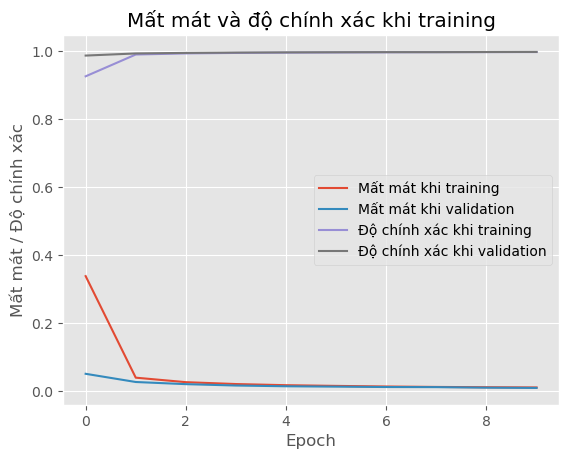

In [44]:
import matplotlib.pyplot as plt 

# Vẽ biểu đồ
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history['loss'], label = 'Mất mát khi training')
plt.plot(np.arange(0, EPOCHS), H.history['val_loss'], label = 'Mất mát khi validation')
plt.plot(np.arange(0, EPOCHS), H.history['accuracy'], label = 'Độ chính xác khi training')
plt.plot(np.arange(0, EPOCHS), H.history['val_accuracy'], label = 'Độ chính xác khi validation')
plt.title('Mất mát và độ chính xác khi training')
plt.xlabel('Epoch')
plt.ylabel('Mất mát / Độ chính xác')
plt.legend()
plt.show()